In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=FutureWarning)

In [3]:
raw_data = pd.read_csv('student_data.csv')
raw_data0

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
raw_data.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


In [5]:
raw_data = raw_data.drop('address',axis=1)
raw_data

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,LE3,A,2,2,services,services,course,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,GT3,T,1,1,other,other,course,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,LE3,T,3,2,services,other,course,...,4,4,1,3,4,5,0,11,12,10


In [6]:
numeric_columns = raw_data.select_dtypes(include='number')
numeric_columns

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


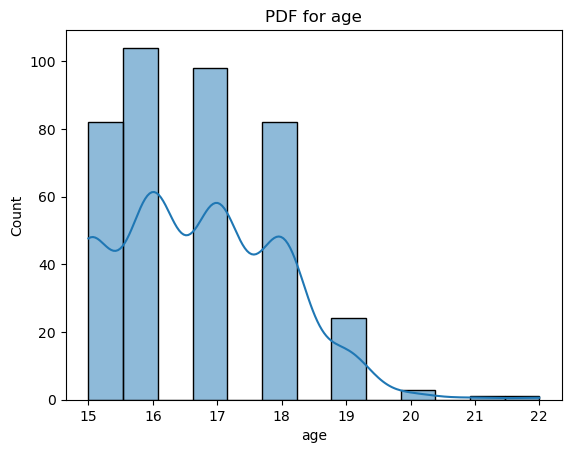

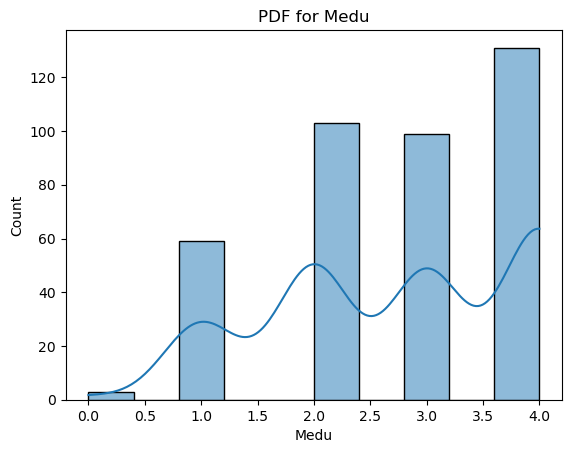

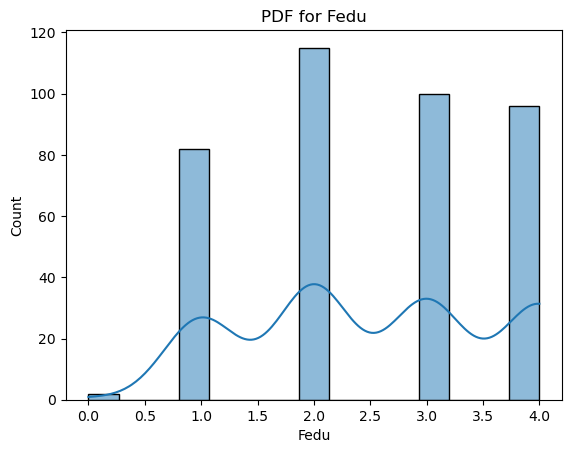

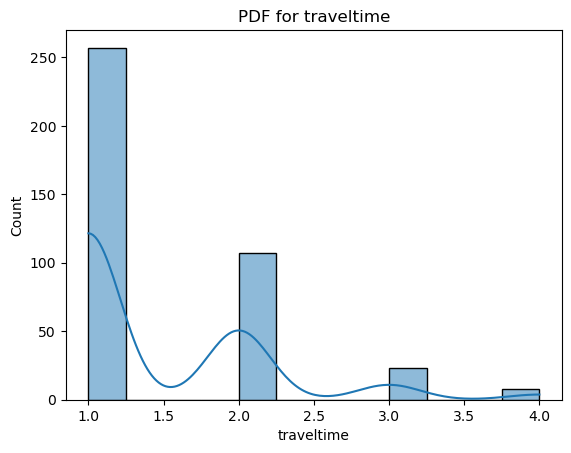

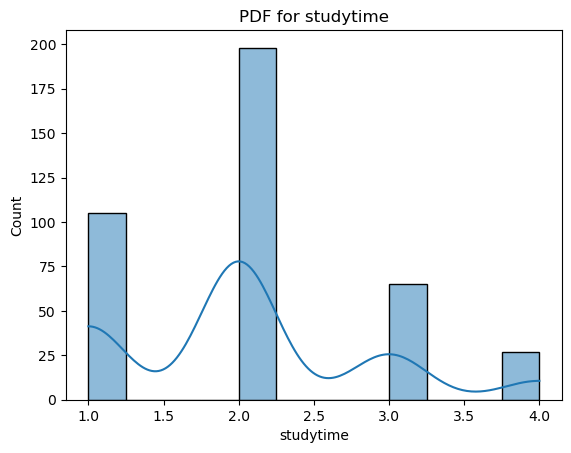

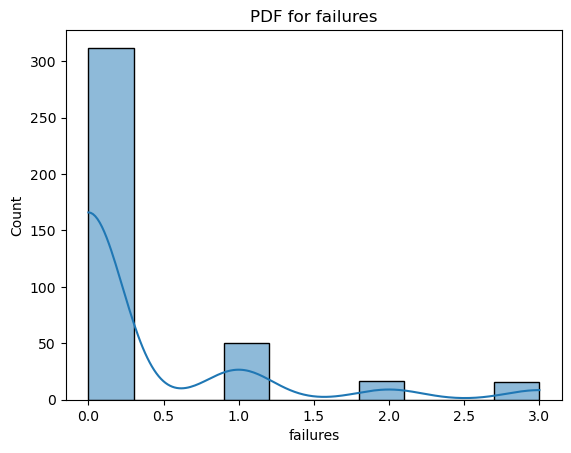

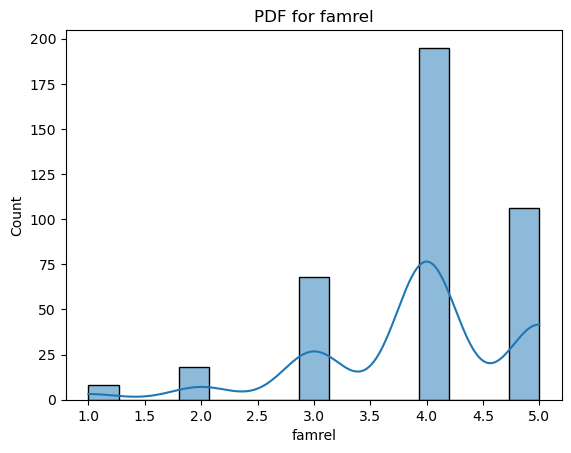

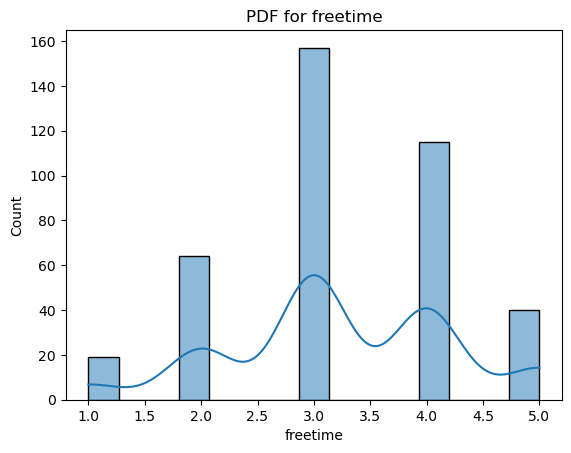

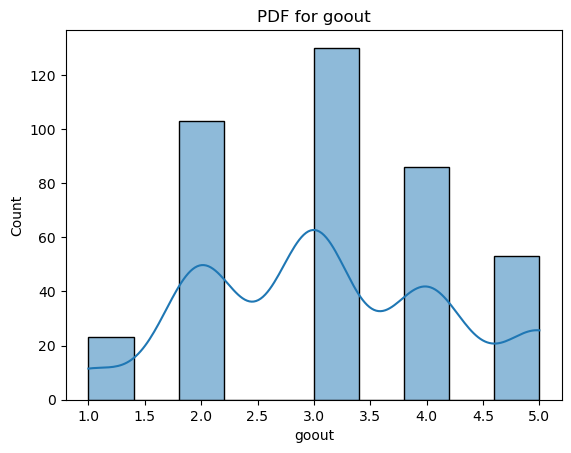

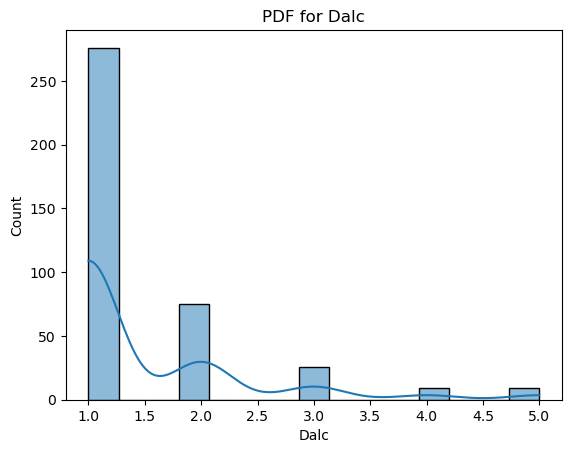

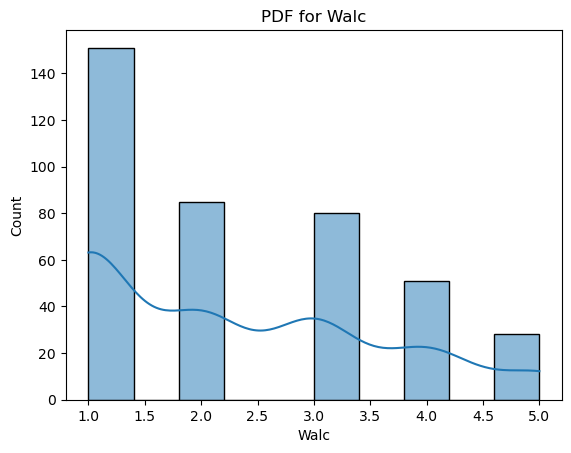

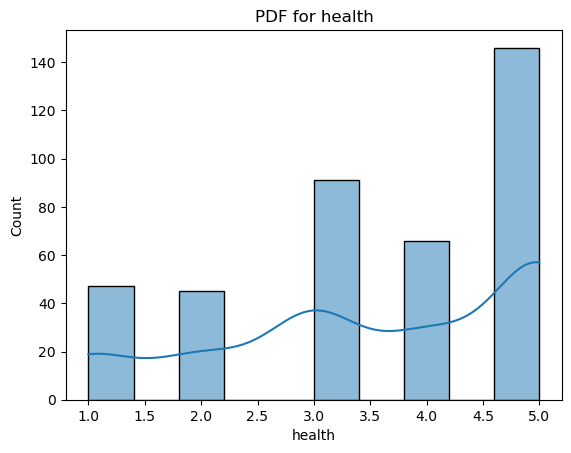

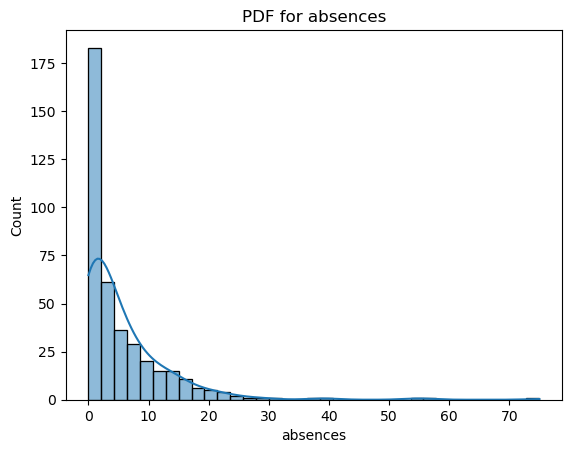

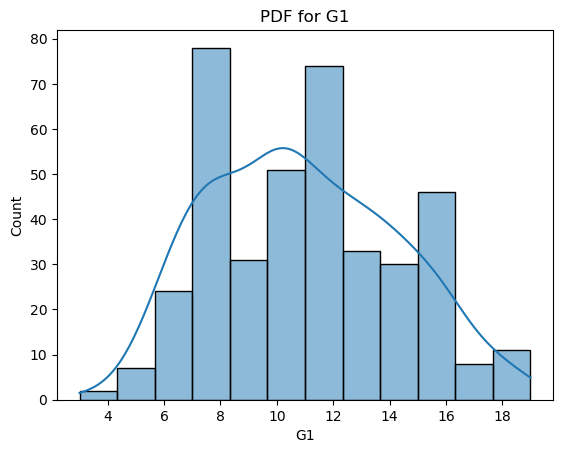

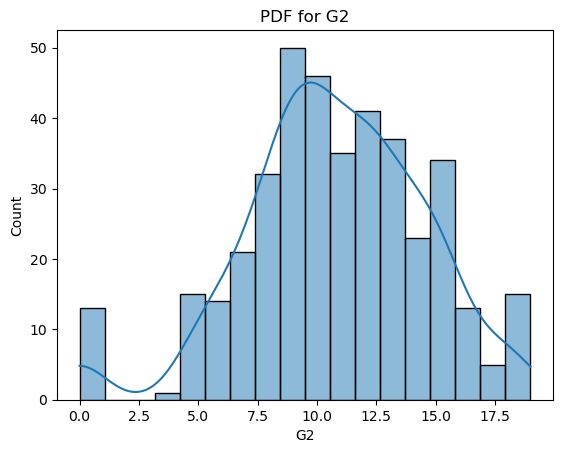

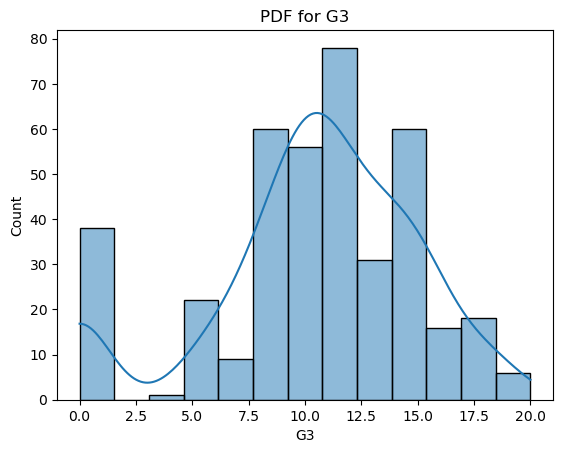

In [7]:
# PDF
for column in numeric_columns.columns:
    sns.histplot(numeric_columns[column], kde=True)
    plt.title(f'PDF for {column}')
    plt.show()

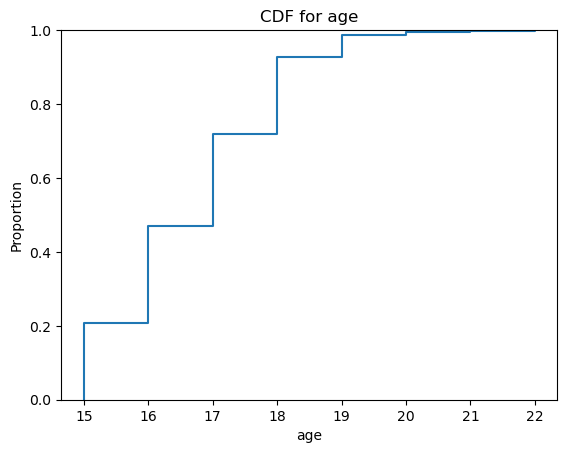

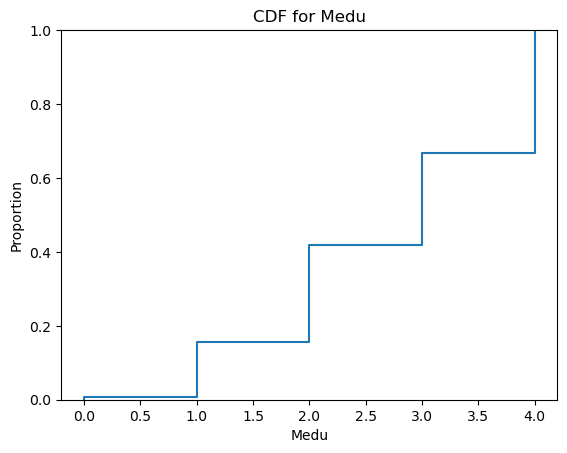

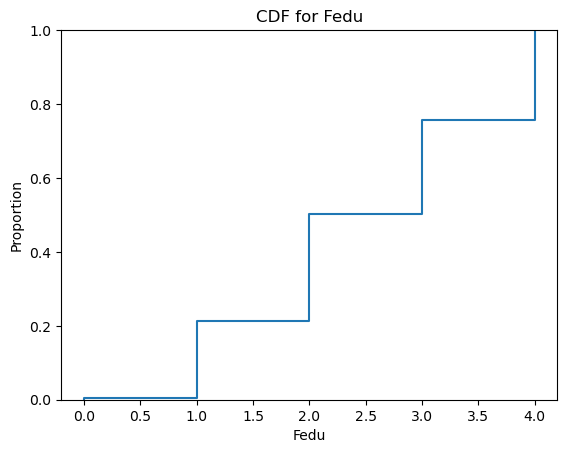

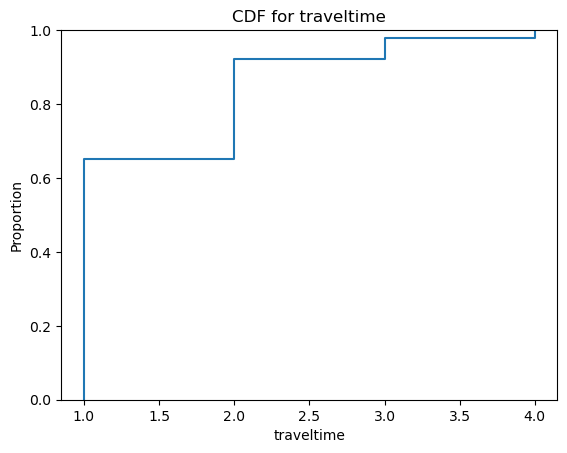

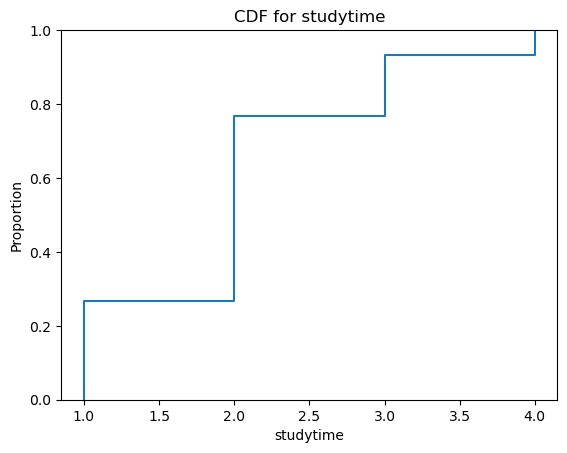

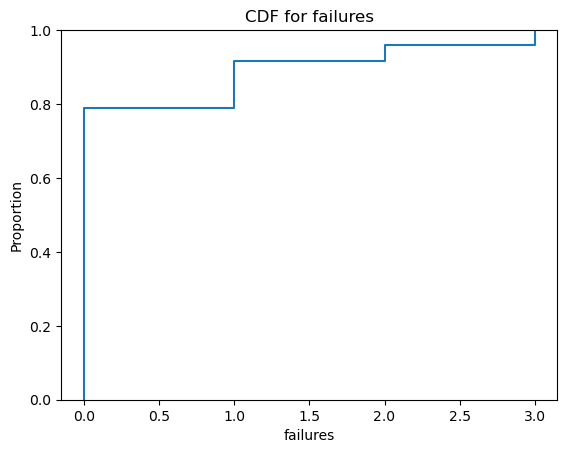

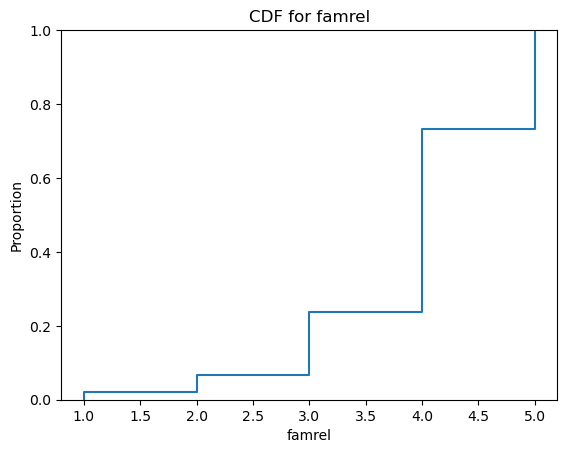

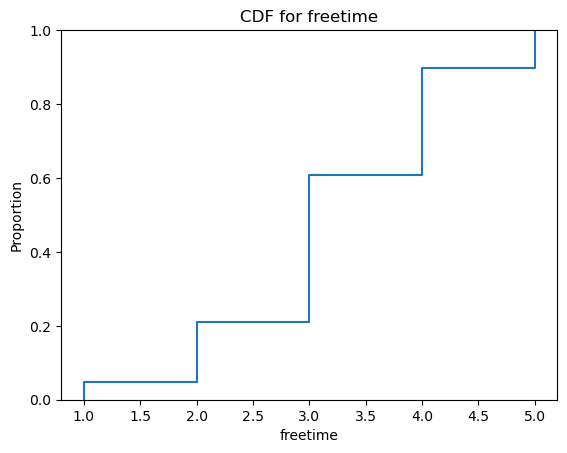

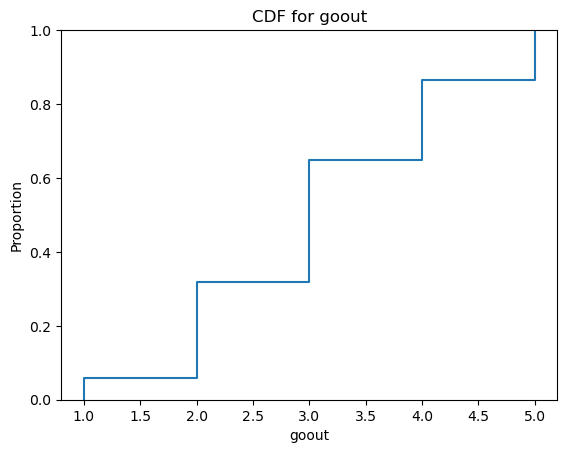

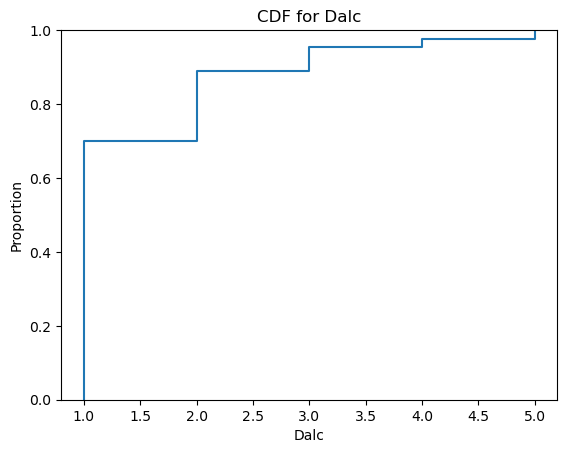

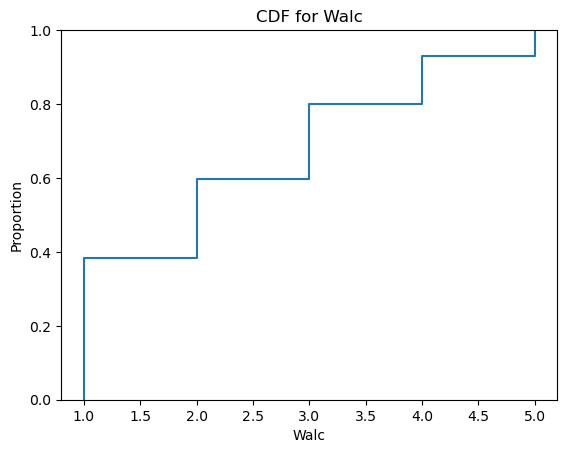

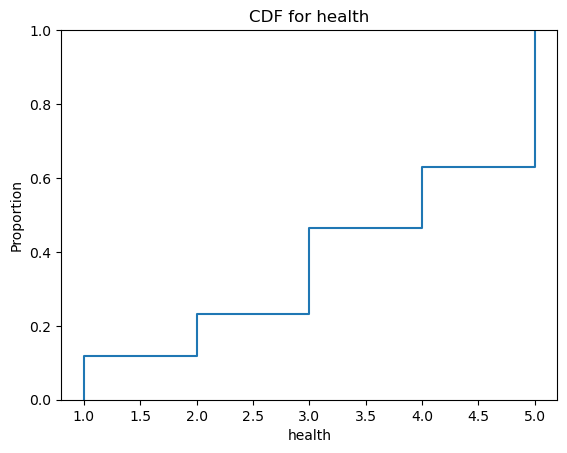

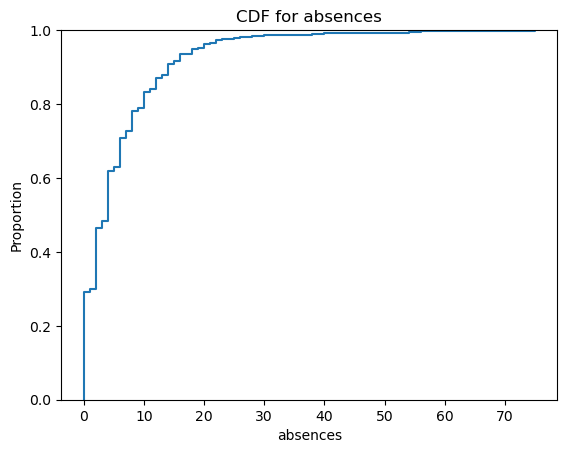

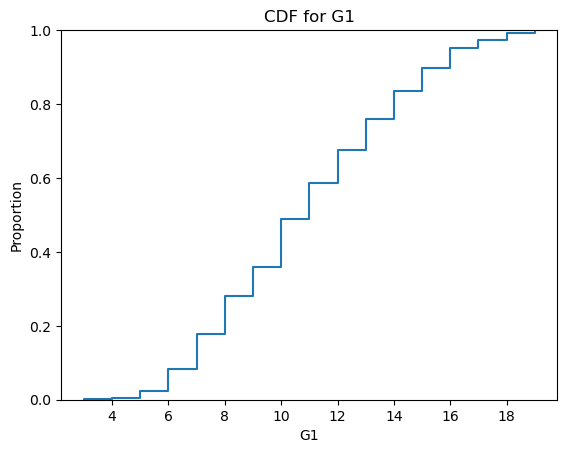

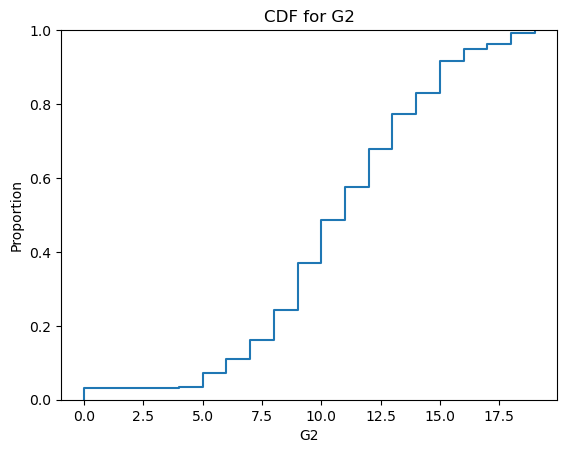

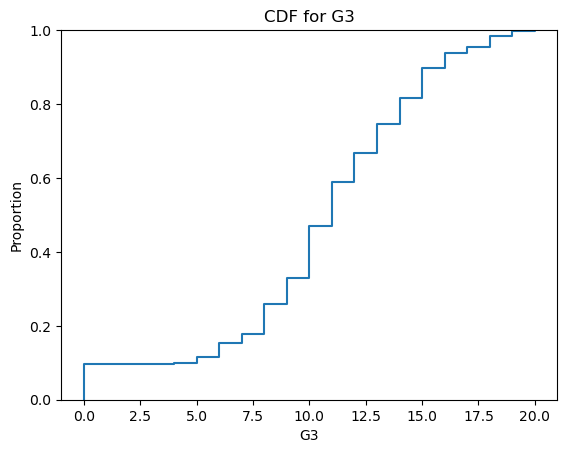

In [8]:
# CDF
for column in numeric_columns.columns:
    sns.ecdfplot(numeric_columns[column])
    plt.title(f'CDF for {column}')
    plt.show()

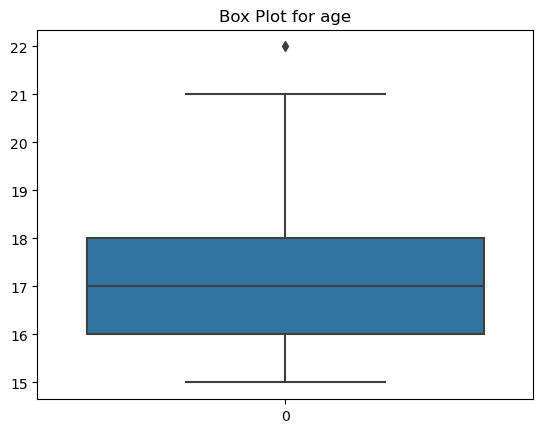

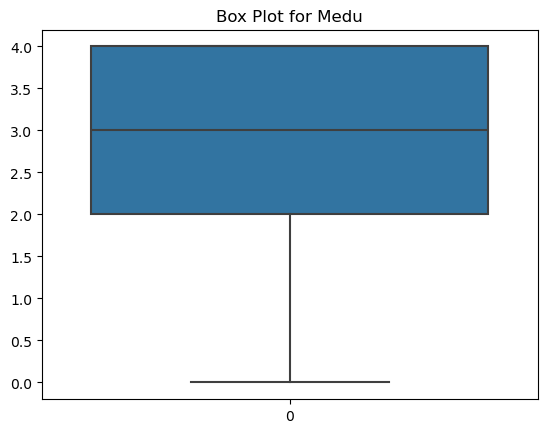

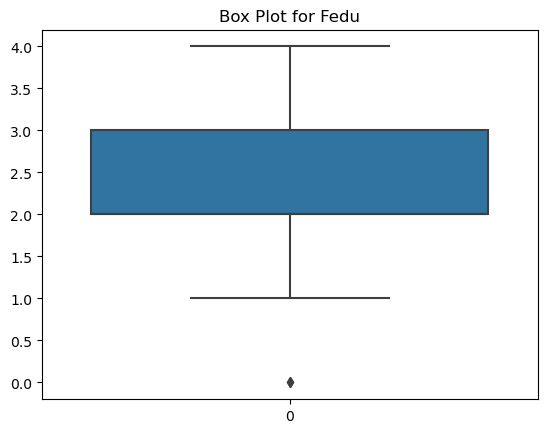

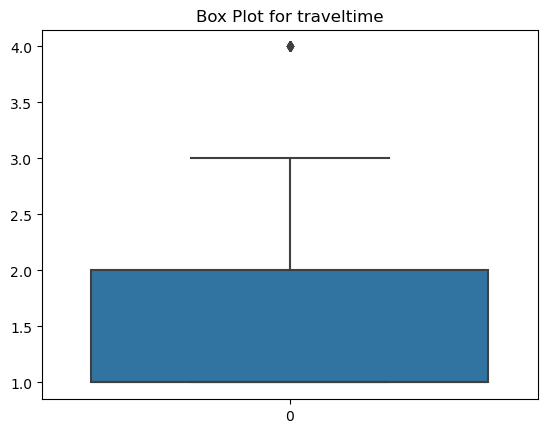

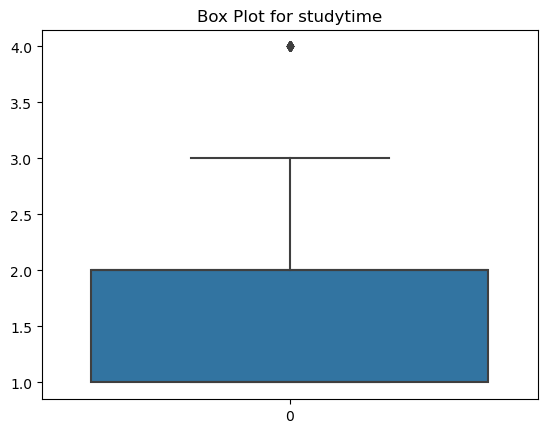

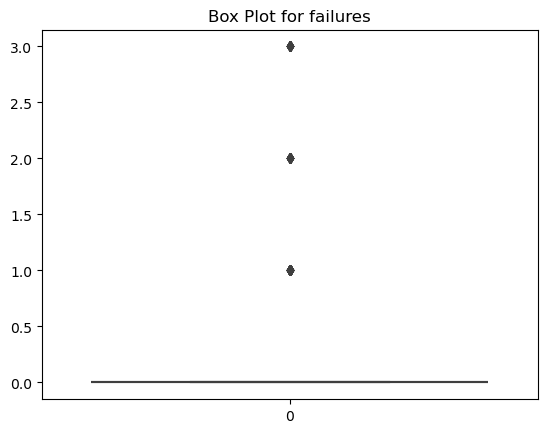

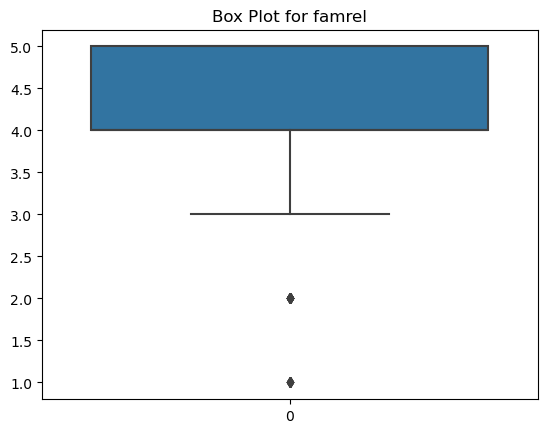

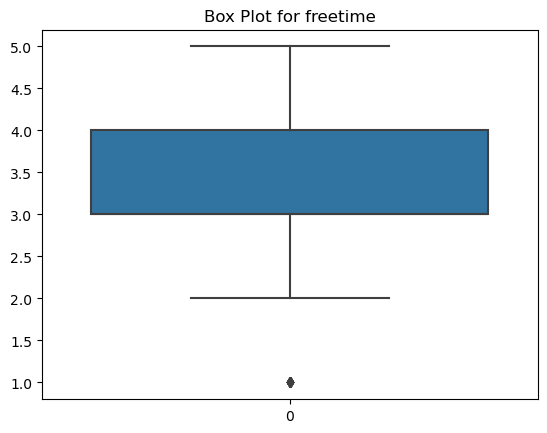

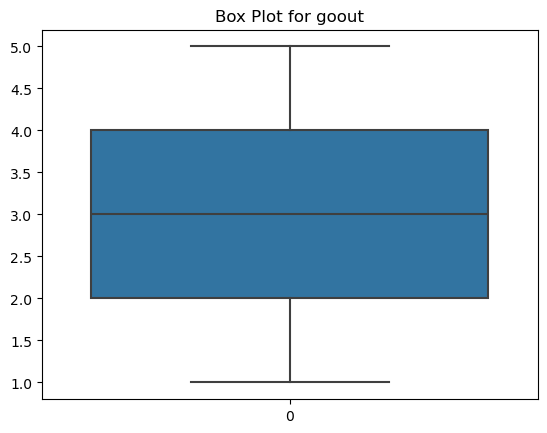

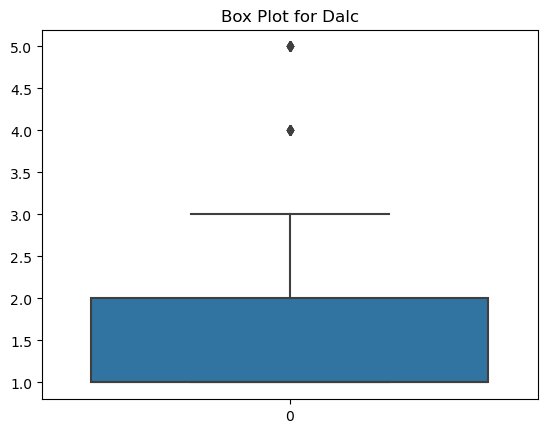

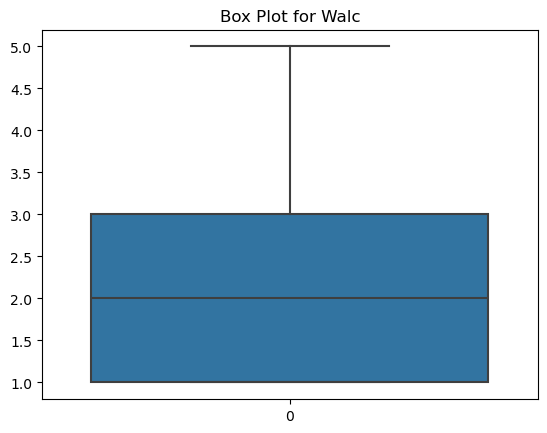

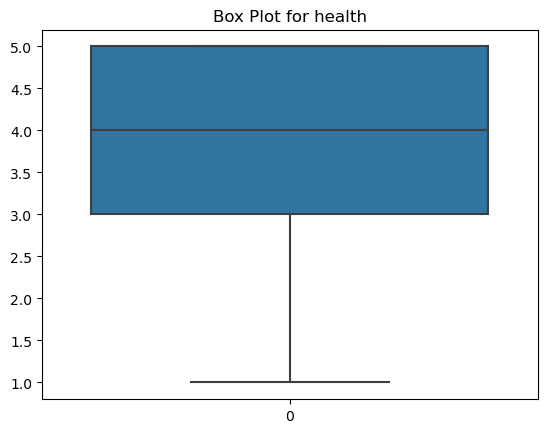

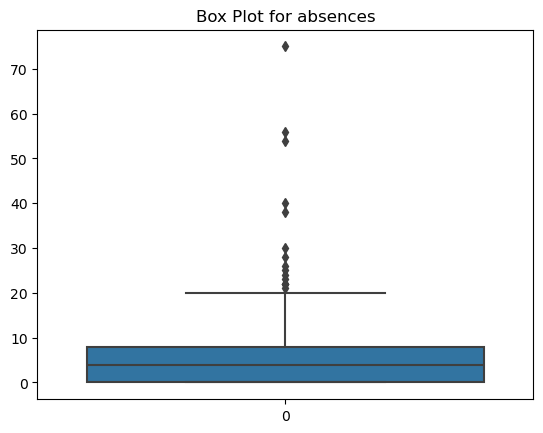

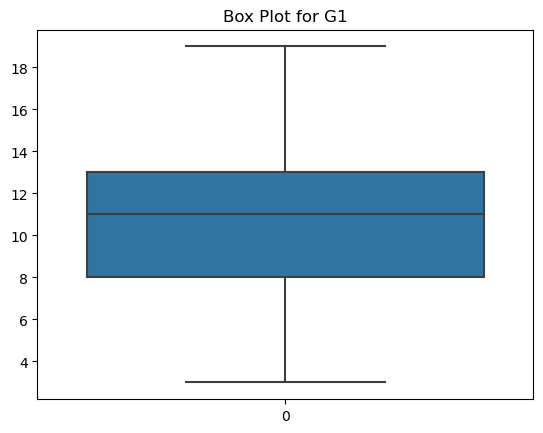

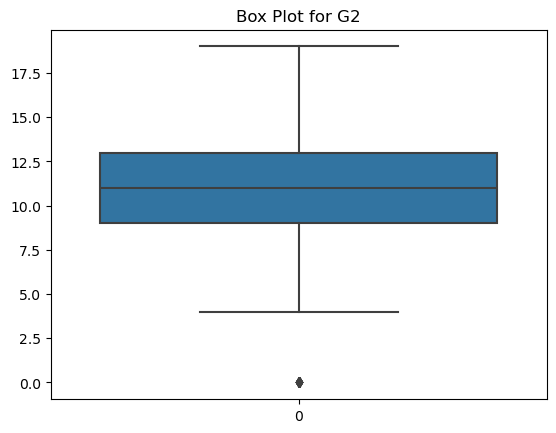

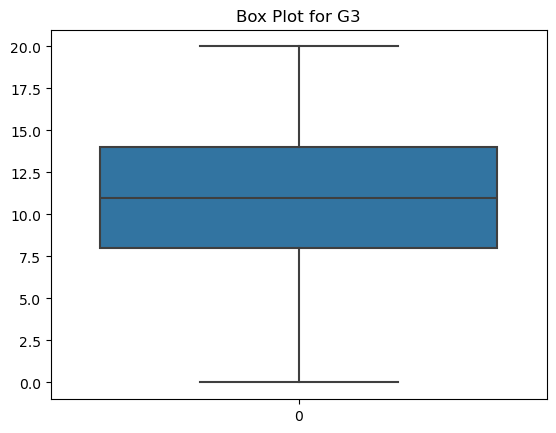

In [9]:
# Box plots
for column in numeric_columns.columns:
    sns.boxplot(raw_data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns_to_encode = ['famsize','Fedu','school', 'sex', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
                      'guardian', 'schoolsup', 'famsup', 'paid', 
                      'activities', 'nursery', 'higher', 'internet', 'romantic']

# Apply LabelEncoder in a loop
for col in columns_to_encode:
    raw_data[col + '_enc'] = le.fit_transform(raw_data[col])

# Drop original columns
raw_data = raw_data.drop(columns_to_encode, axis=1)

In [11]:
raw_data

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,reason_enc,guardian_enc,schoolsup_enc,famsup_enc,paid_enc,activities_enc,nursery_enc,higher_enc,internet_enc,romantic_enc
0,18,4,2,2,0,4,3,4,1,1,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,2,0,5,3,3,1,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,4,3,2,2,3,...,2,1,1,0,1,0,1,1,1,0
3,15,4,1,3,0,3,2,2,1,1,...,1,1,0,1,1,1,1,1,1,1
4,16,3,1,2,0,4,3,2,1,2,...,1,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,1,2,2,5,5,4,4,5,...,0,2,0,1,1,0,1,1,0,0
391,17,3,2,1,0,2,4,5,3,4,...,0,1,0,0,0,0,0,1,1,0
392,21,1,1,1,3,5,5,3,3,3,...,0,2,0,0,0,0,0,1,0,0
393,18,3,3,1,0,4,4,1,3,4,...,0,1,0,0,0,0,0,1,1,0


In [12]:
from scipy import stats
z_score_threshold = 3
z_scores = stats.zscore(raw_data)
outlier_indices = (z_scores > z_score_threshold).any(axis=1)
cleaned_data = raw_data[~outlier_indices]
cleaned_data

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,reason_enc,guardian_enc,schoolsup_enc,famsup_enc,paid_enc,activities_enc,nursery_enc,higher_enc,internet_enc,romantic_enc
0,18,4,2,2,0,4,3,4,1,1,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,2,0,5,3,3,1,1,...,0,0,0,1,0,0,0,1,1,0
3,15,4,1,3,0,3,2,2,1,1,...,1,1,0,1,1,1,1,1,1,1
4,16,3,1,2,0,4,3,2,1,2,...,1,0,0,1,1,0,1,1,0,0
5,16,4,1,2,0,5,4,2,1,2,...,3,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,18,1,2,2,1,1,1,1,1,1,...,0,1,0,0,0,1,1,1,0,0
390,20,2,1,2,2,5,5,4,4,5,...,0,2,0,1,1,0,1,1,0,0
391,17,3,2,1,0,2,4,5,3,4,...,0,1,0,0,0,0,0,1,1,0
393,18,3,3,1,0,4,4,1,3,4,...,0,1,0,0,0,0,0,1,1,0


<Axes: >

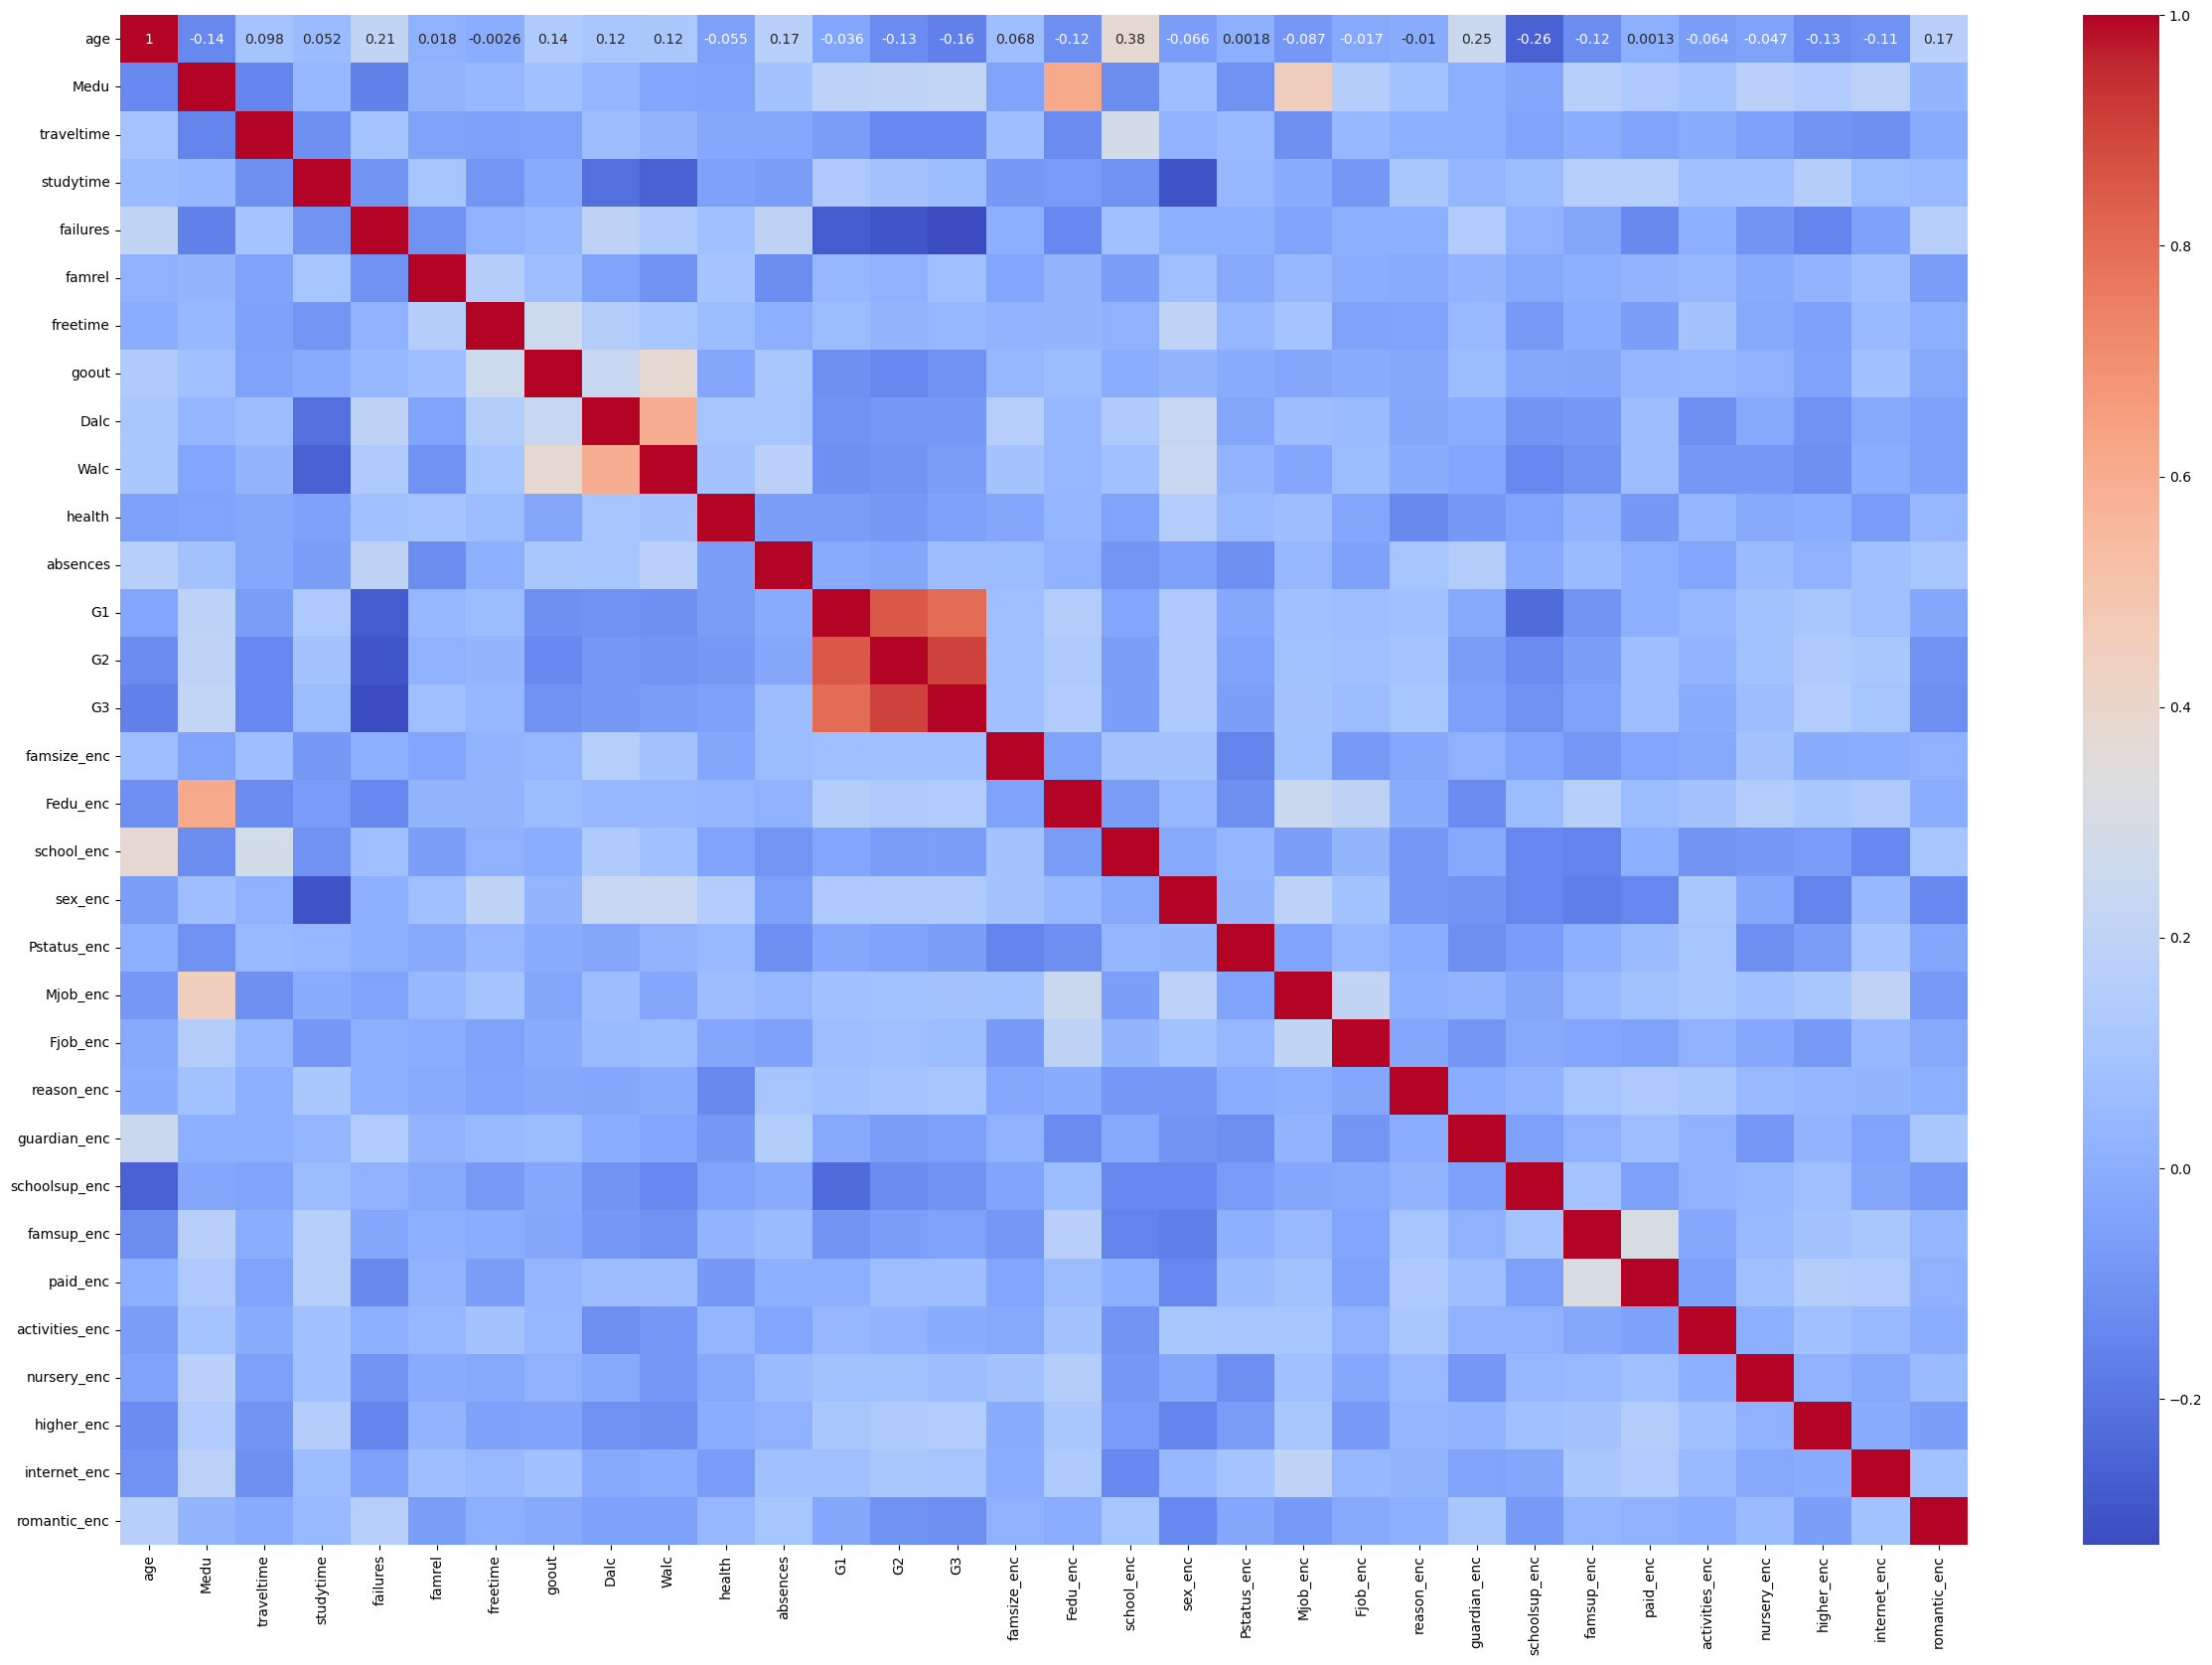

In [13]:
x = cleaned_data.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(x,annot=True,cmap='coolwarm')

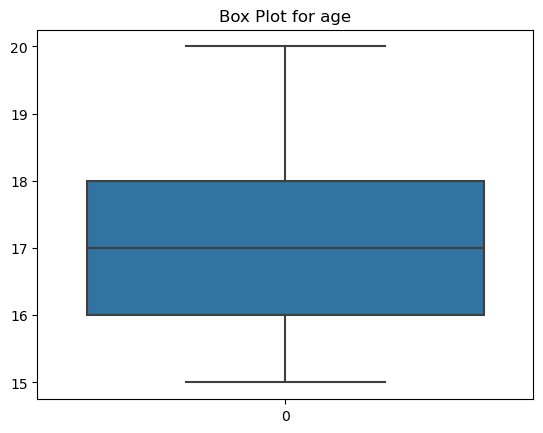

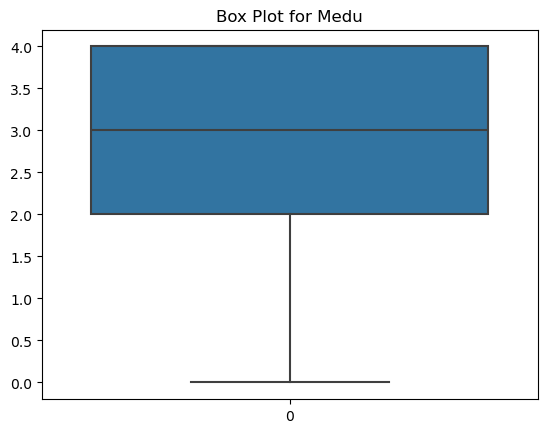

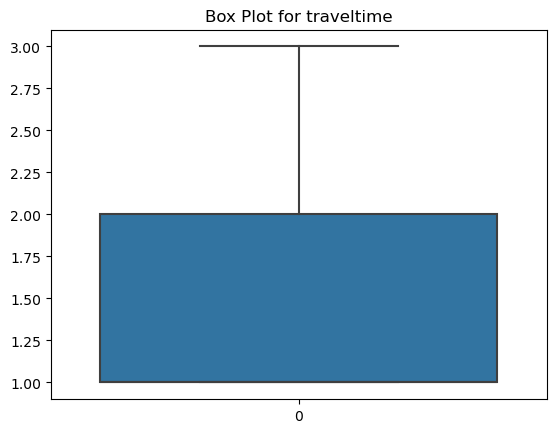

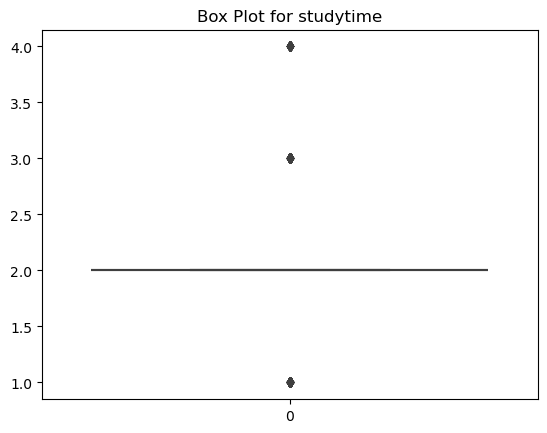

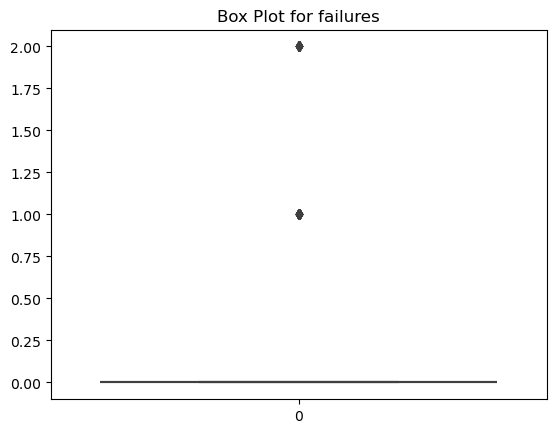

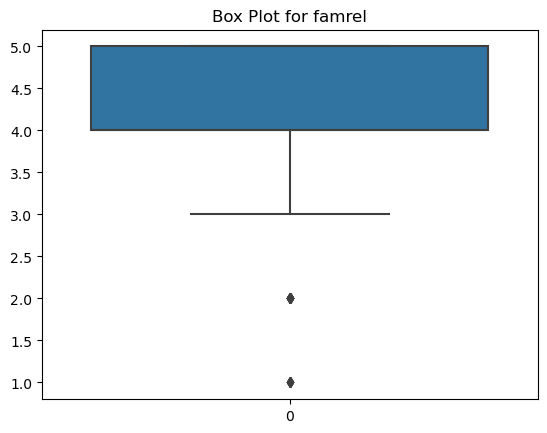

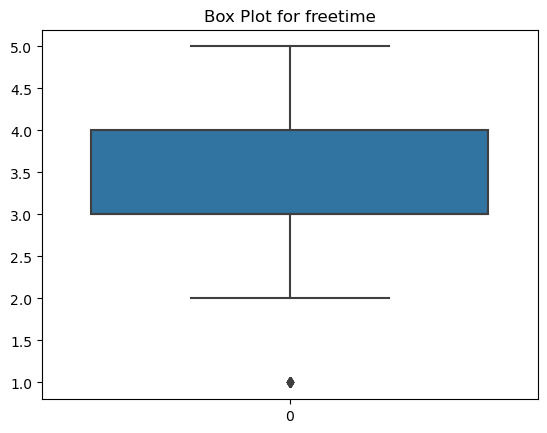

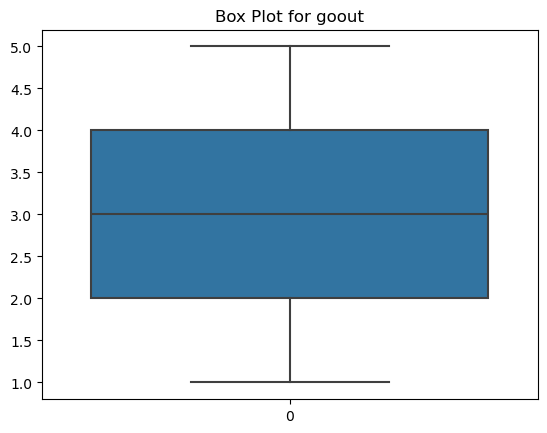

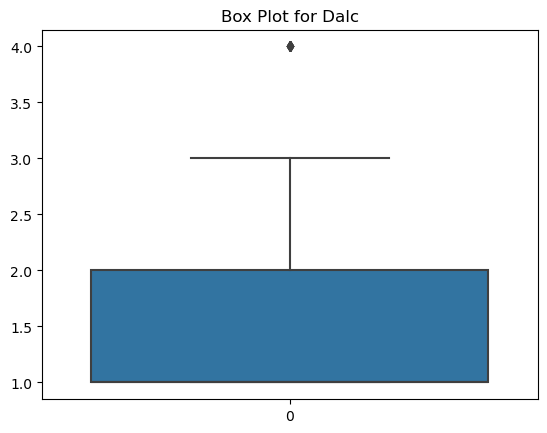

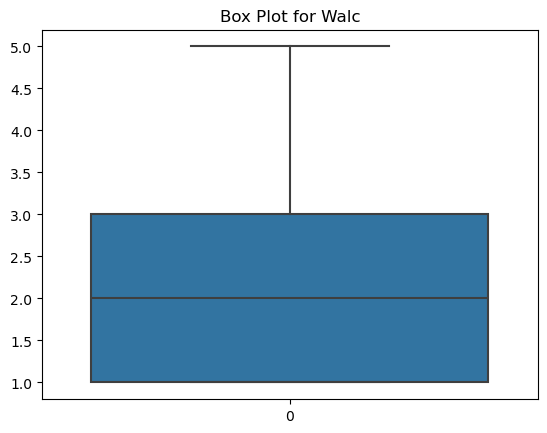

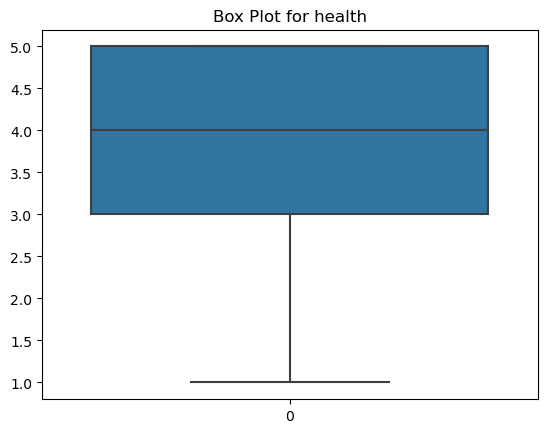

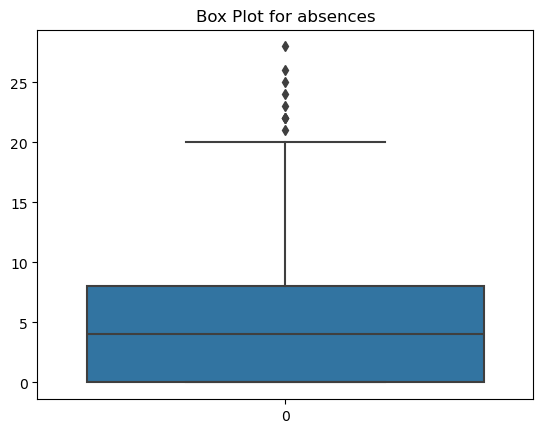

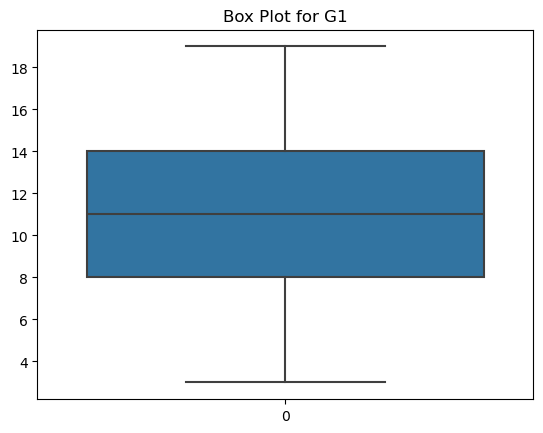

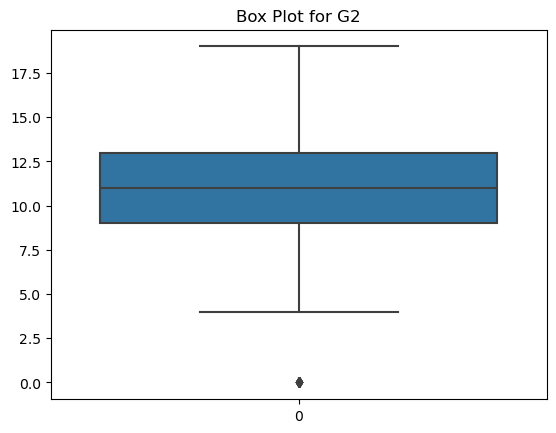

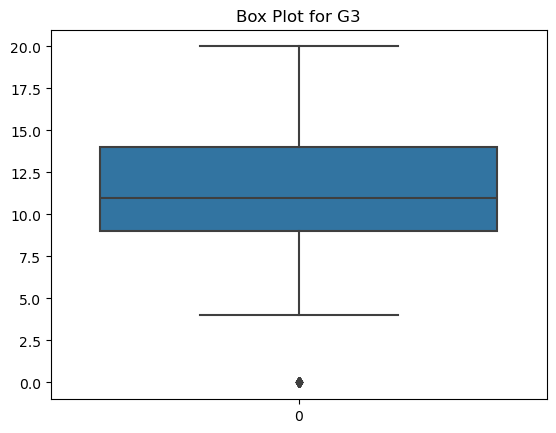

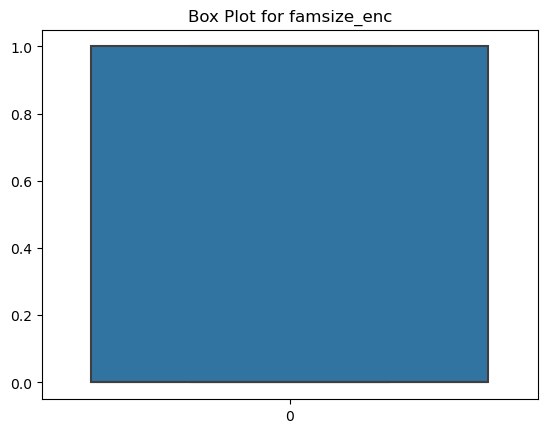

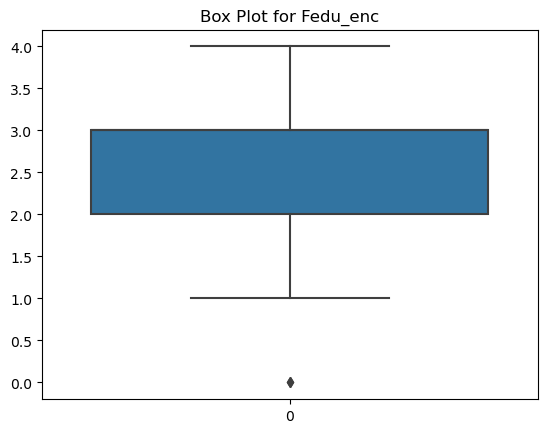

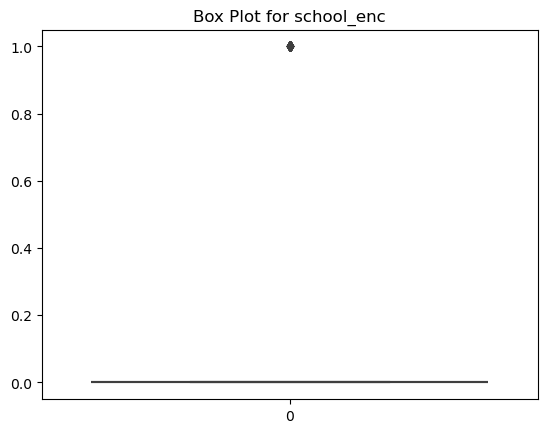

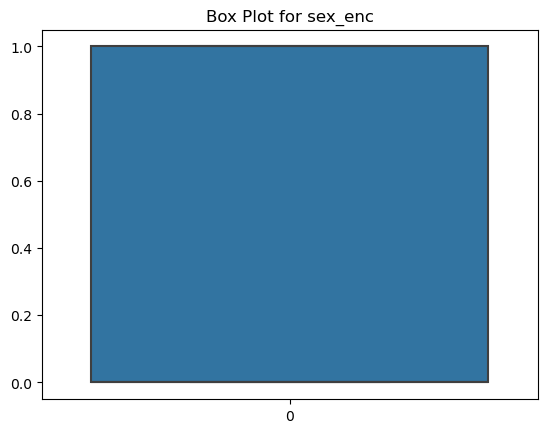

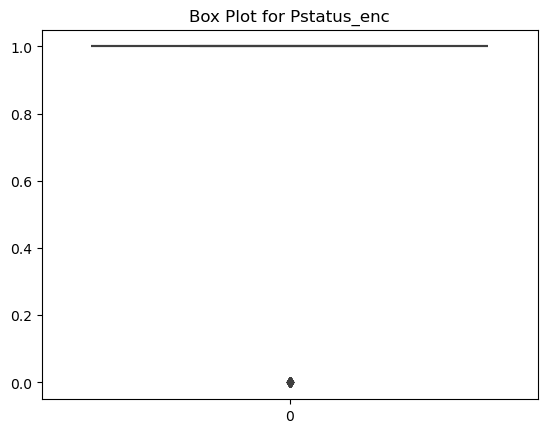

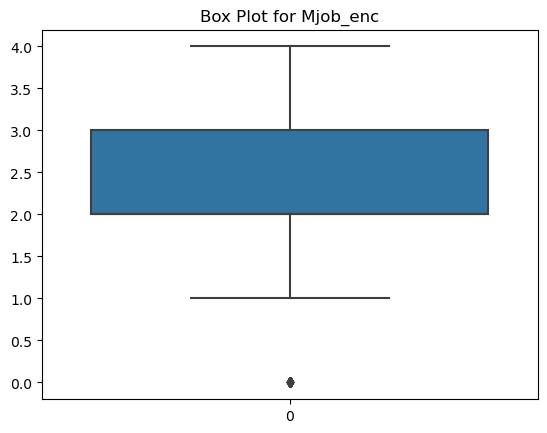

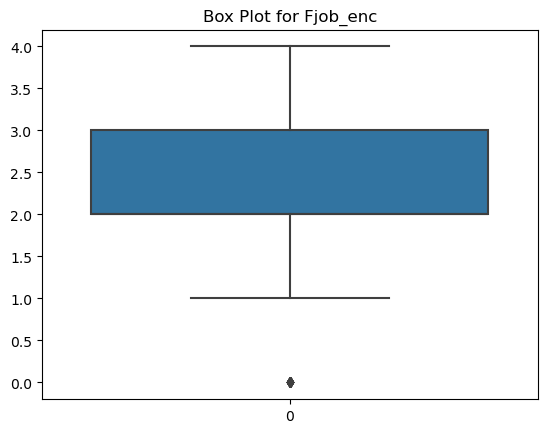

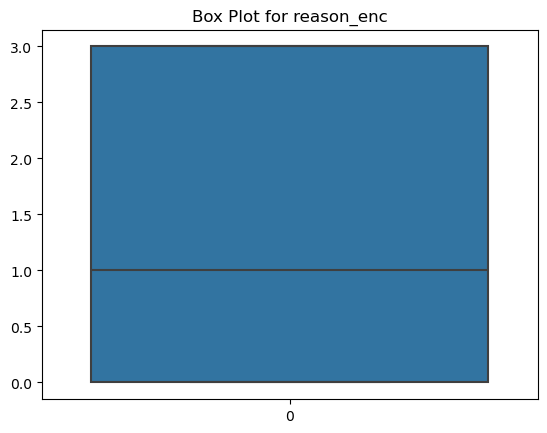

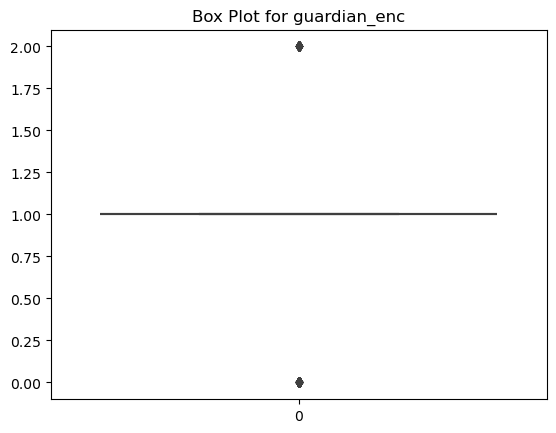

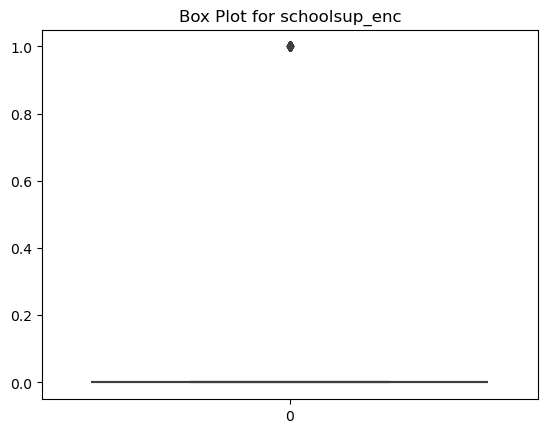

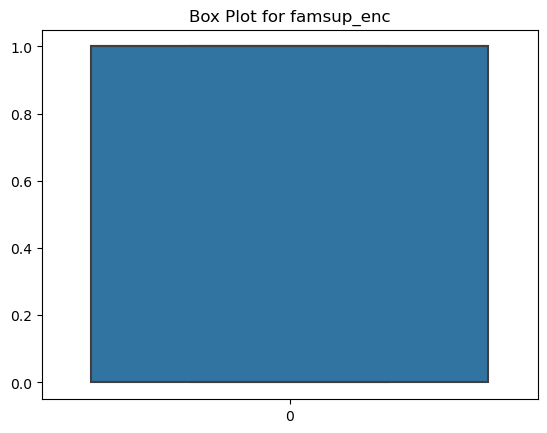

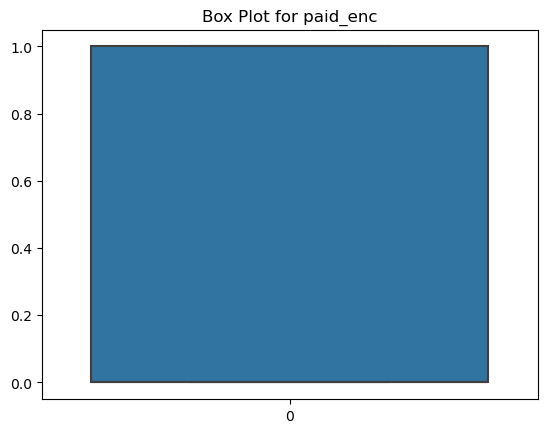

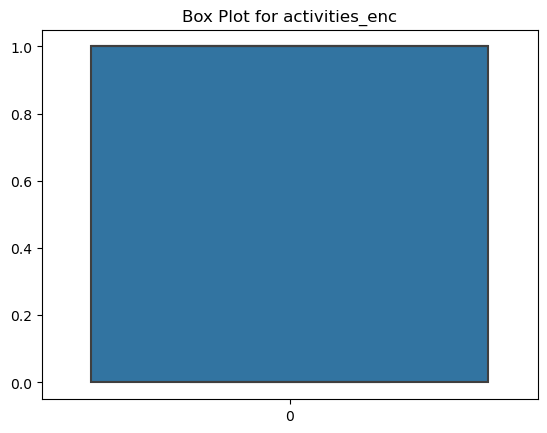

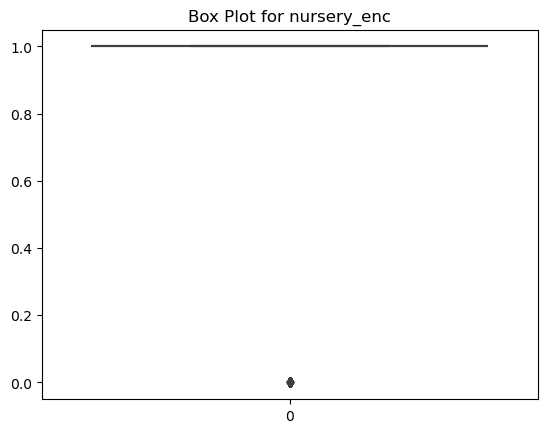

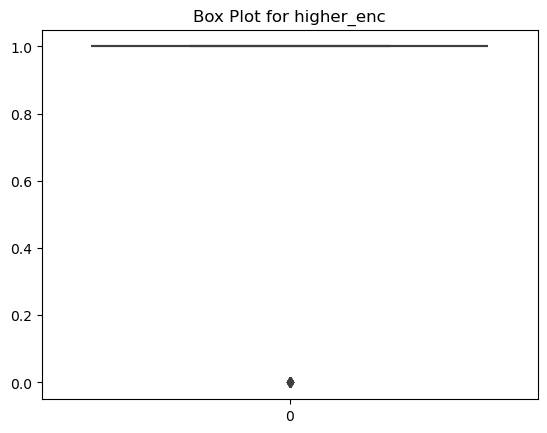

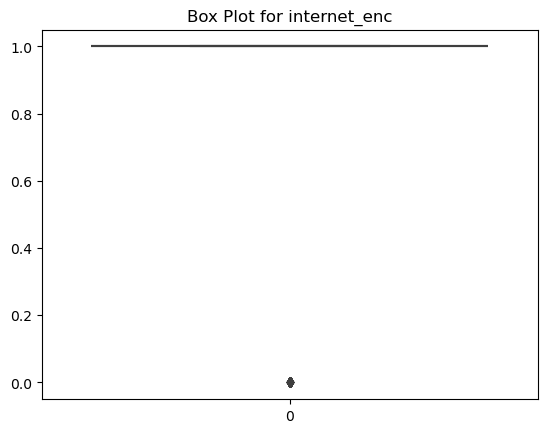

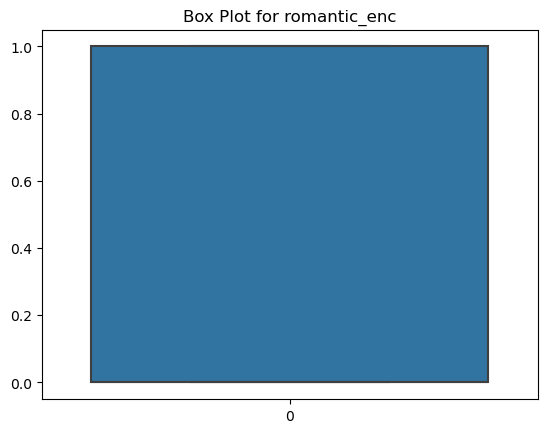

In [14]:
# Box plots
for column in cleaned_data.columns:
    sns.boxplot(cleaned_data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [15]:
correlations = raw_data.corr()['G3'].abs().sort_values()

print(correlations)

freetime          0.011307
activities_enc    0.016100
absences          0.034247
famsup_enc        0.039157
Fjob_enc          0.042286
school_enc        0.045017
famrel            0.051363
nursery_enc       0.051568
Walc              0.051939
Dalc              0.054660
Pstatus_enc       0.058009
health            0.061335
guardian_enc      0.070109
famsize_enc       0.081407
schoolsup_enc     0.082788
studytime         0.097820
internet_enc      0.098483
paid_enc          0.101996
Mjob_enc          0.102082
sex_enc           0.103456
traveltime        0.117142
reason_enc        0.121994
romantic_enc      0.129970
goout             0.132791
Fedu_enc          0.152457
age               0.161579
higher_enc        0.182465
Medu              0.217147
failures          0.360415
G1                0.801468
G2                0.904868
G3                1.000000
Name: G3, dtype: float64


<Axes: >

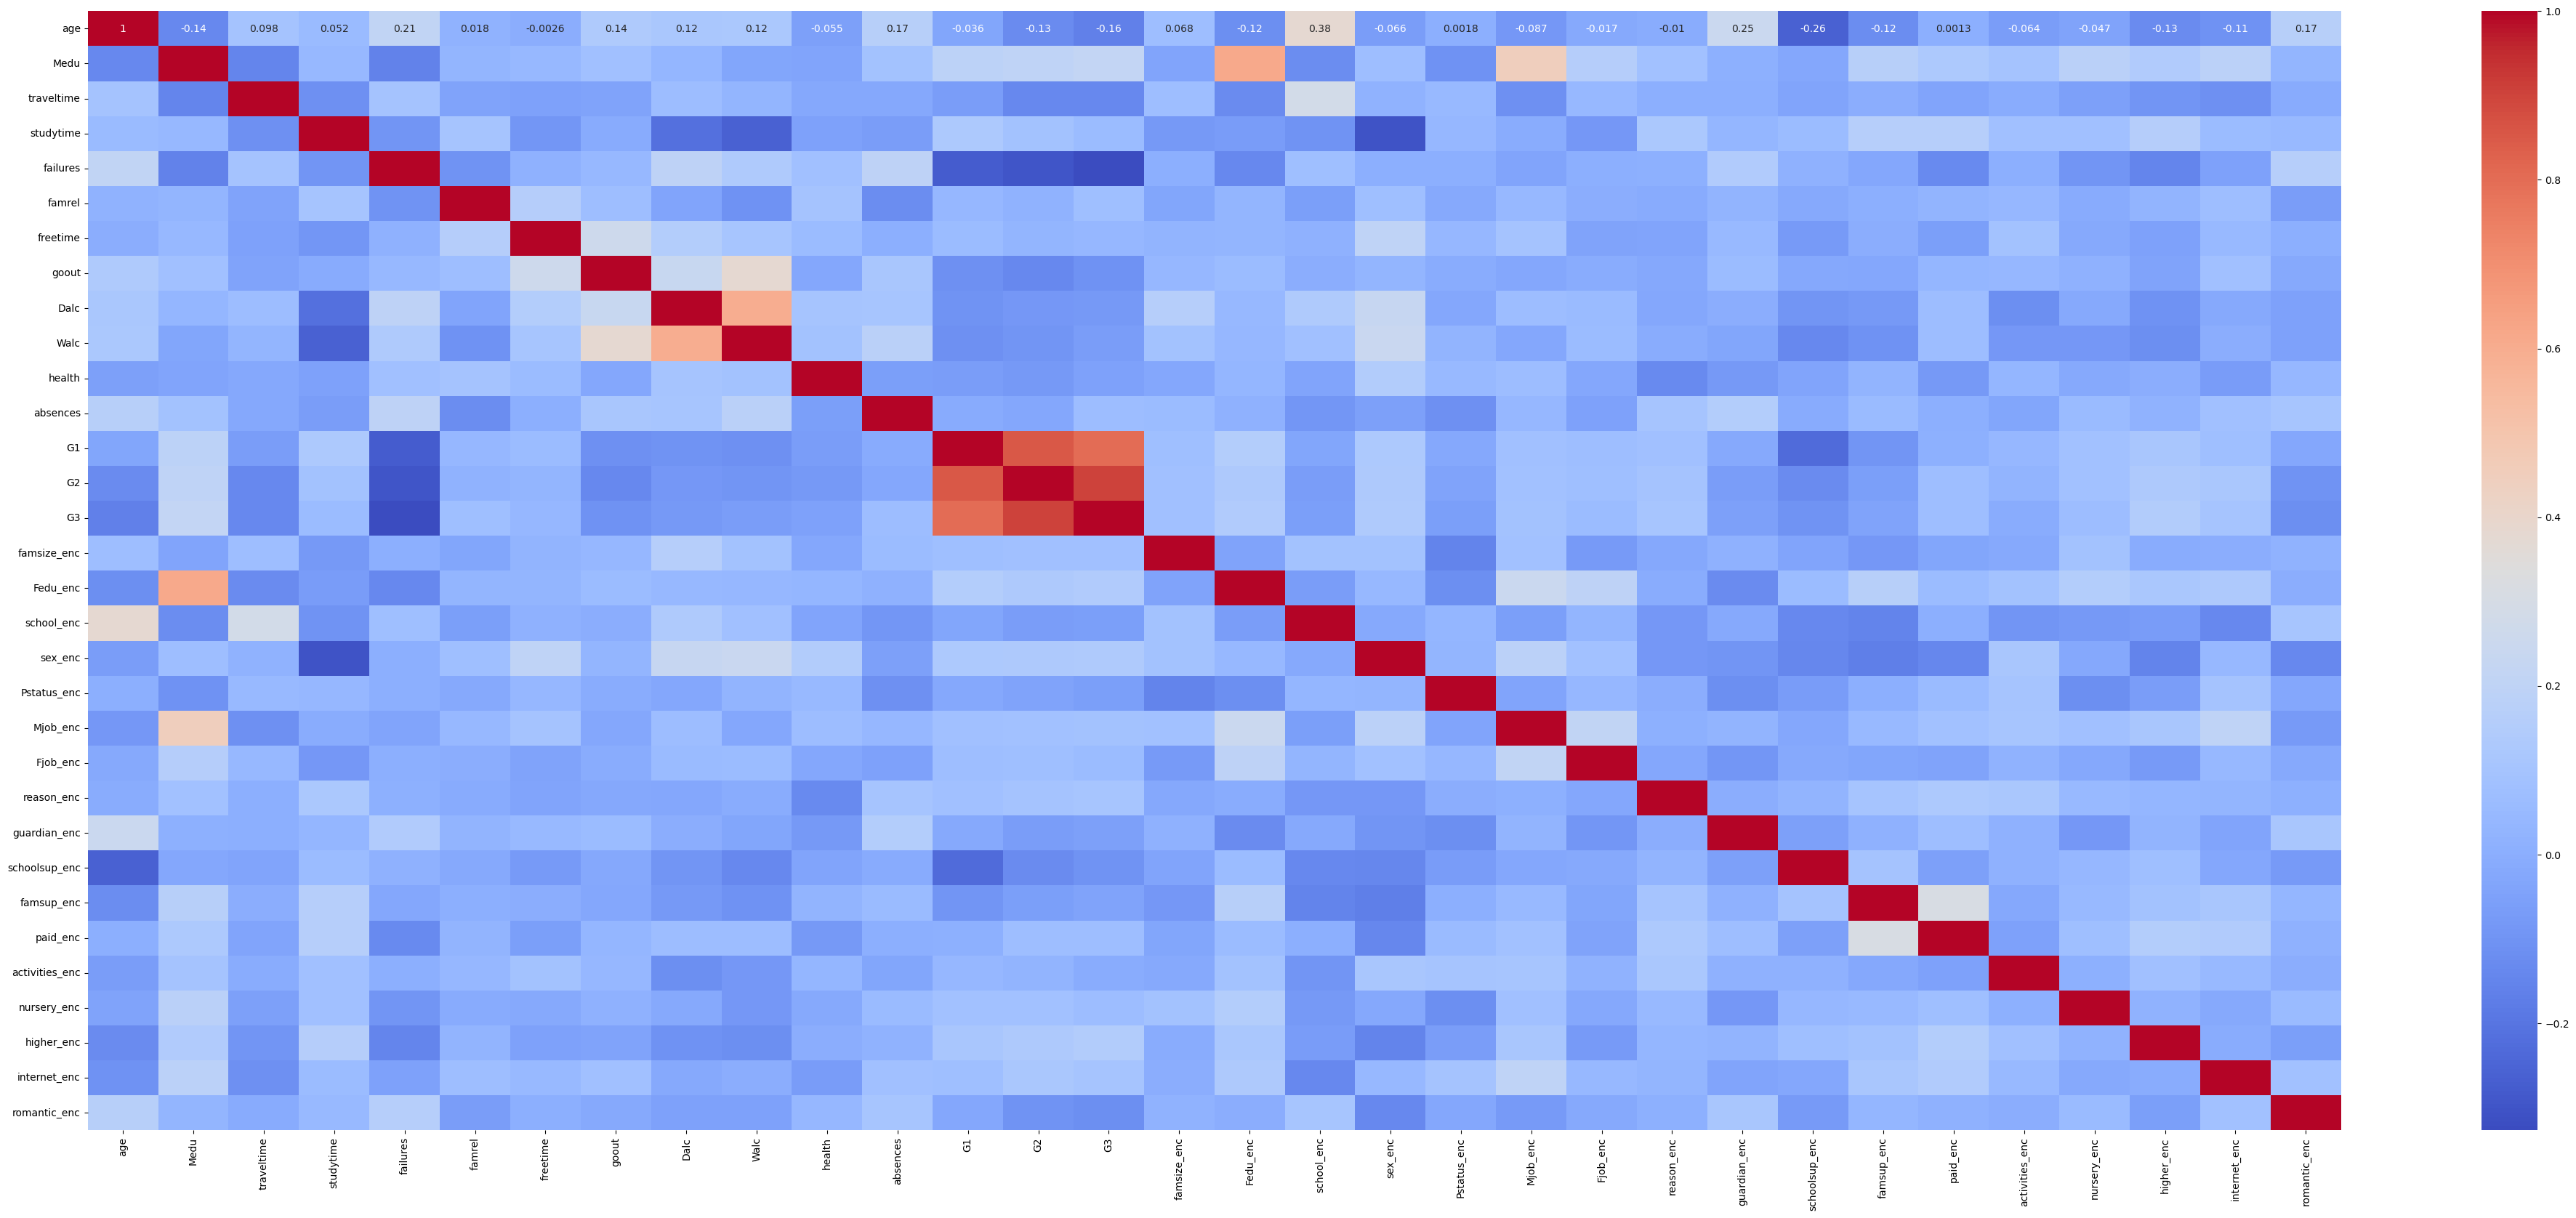

In [16]:
x= cleaned_data.corr()
plt.figure(figsize=(50, 20))
sns.heatmap(x,annot=True,cmap='coolwarm')

In [17]:
data1=cleaned_data.copy()

In [18]:
data1 = data1.drop(['famrel','Dalc','Walc','school_enc','Pstatus_enc','Mjob_enc','Fjob_enc','guardian_enc','famsup_enc','paid_enc','activities_enc','famsize_enc','Fedu_enc','nursery_enc','freetime','traveltime','schoolsup_enc','internet_enc'],axis=1)
data1

,age,Medu,studytime,failures,goout,health,absences,G1,G2,G3,sex_enc,reason_enc,higher_enc,romantic_enc
0,18,4,2,0,4,3,6,5,6,6,0,0,1,0
1,17,1,2,0,3,3,4,5,5,6,0,0,1,0
3,15,4,3,0,2,5,2,15,14,15,0,1,1,1
4,16,3,2,0,2,5,4,6,10,10,0,1,1,0
5,16,4,2,0,2,5,10,15,15,15,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,18,1,2,1,1,5,0,6,5,0,0,0,1,0
390,20,2,2,2,4,4,11,9,9,9,1,0,1,0
391,17,3,1,0,5,2,3,14,16,16,1,0,1,0
393,18,3,1,0,1,5,0,11,12,10,1,0,1,0


<Axes: >

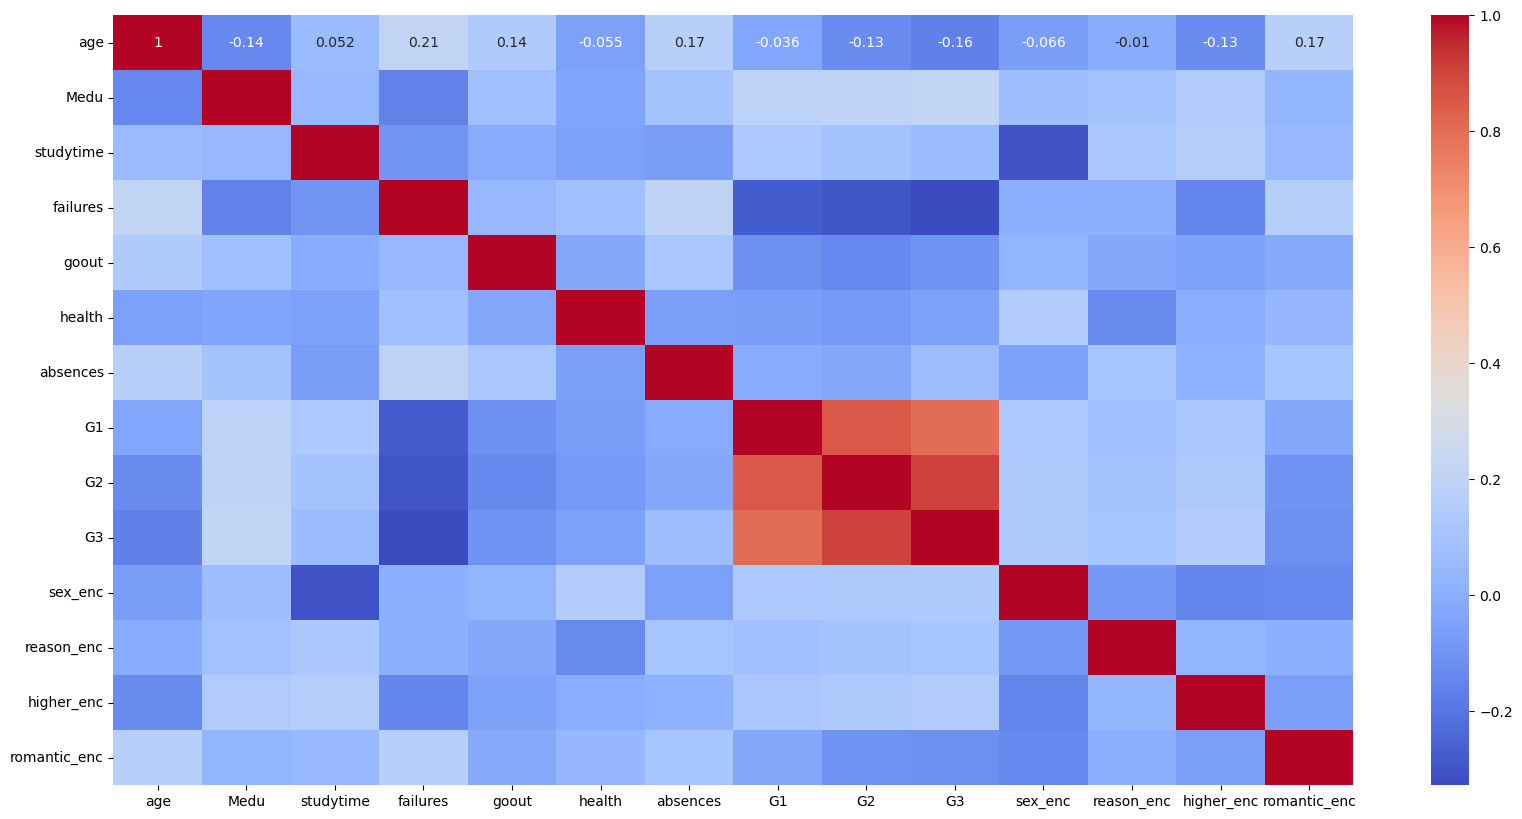

In [19]:
x = data1.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(x,annot=True,cmap='coolwarm')

<Axes: >

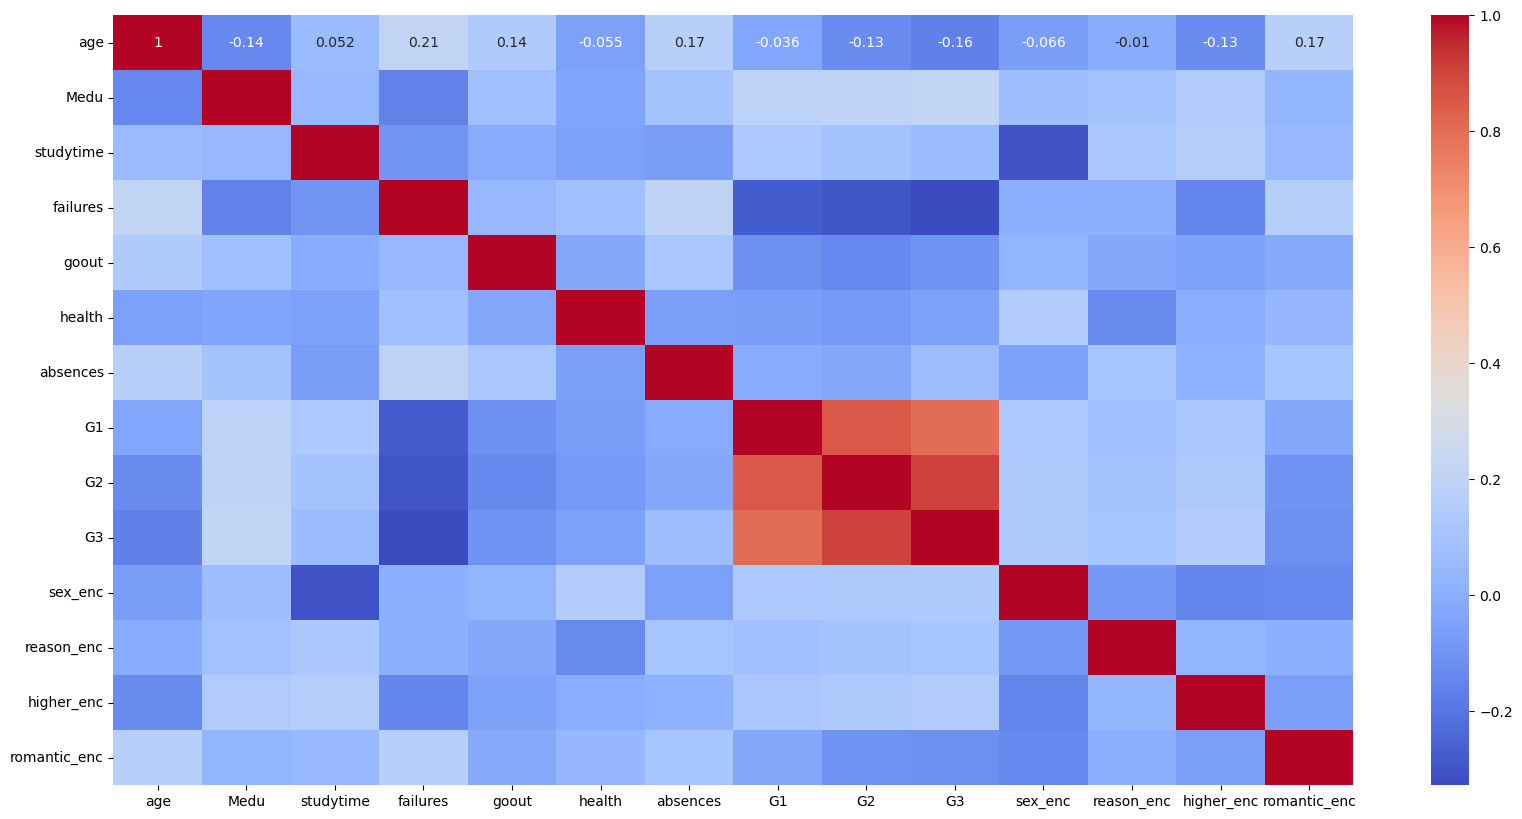

In [20]:
x = data1.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(x,annot=True,cmap='coolwarm')

In [21]:
data1

,age,Medu,studytime,failures,goout,health,absences,G1,G2,G3,sex_enc,reason_enc,higher_enc,romantic_enc
0,18,4,2,0,4,3,6,5,6,6,0,0,1,0
1,17,1,2,0,3,3,4,5,5,6,0,0,1,0
3,15,4,3,0,2,5,2,15,14,15,0,1,1,1
4,16,3,2,0,2,5,4,6,10,10,0,1,1,0
5,16,4,2,0,2,5,10,15,15,15,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,18,1,2,1,1,5,0,6,5,0,0,0,1,0
390,20,2,2,2,4,4,11,9,9,9,1,0,1,0
391,17,3,1,0,5,2,3,14,16,16,1,0,1,0
393,18,3,1,0,1,5,0,11,12,10,1,0,1,0


In [22]:
# clmns dropped in poster
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data1.drop(["G3"], axis = 1)
y = data1["G3"]

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [25]:
reg.score(X_test,y_test)

0.890511907134332

In [26]:
from sklearn.svm import SVR
svm_model = SVR(kernel='rbf', C=20,epsilon=0.19,gamma=0.01)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [27]:
svm_model.score(X_test,y_test)

0.9356658171985051

In [28]:
mse = mean_squared_error(y_test, y_pred)
mse

1.1905047907862671

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9356658171985051

In [30]:
num_predictors = X_train.shape[1]

num_data_points = len(X_test)

adjusted_r2 = 1 - (1 - r2) * (num_data_points - 1) / (num_data_points - num_predictors - 1)
adjusted_r2

0.9248042019203306

In [31]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(reg, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

In [32]:
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

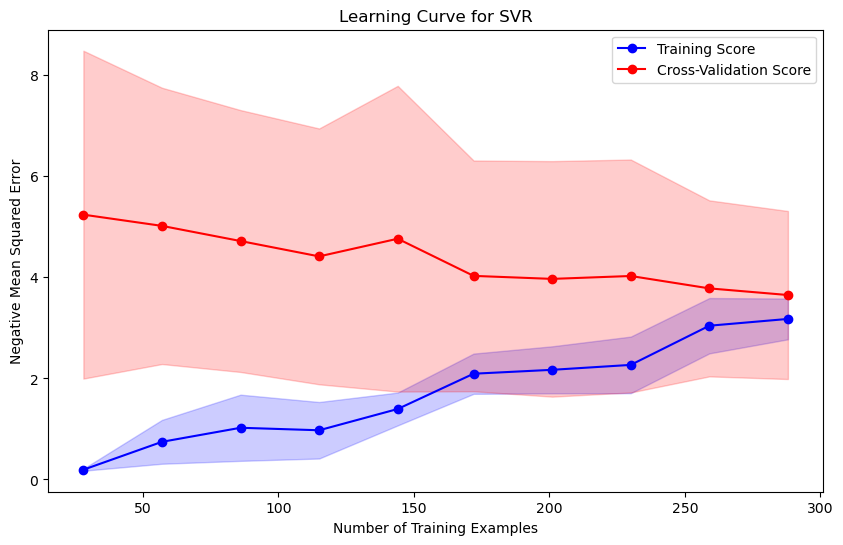

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Learning Curve for SVR')
plt.xlabel('Number of Training Examples')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.show()